1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn

In [129]:
from sklearn.datasets import load_digits

In [130]:
digits = load_digits()

In [131]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [132]:
x=digits.images
y=digits.target

In [133]:
import matplotlib.pyplot as plt
def displayImg(img,y):
    plt.imshow(img,cmap='gray')
    print("target: ",y)
    plt.show()

In [134]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img,cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

target:  0


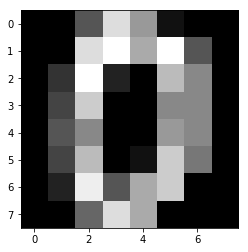

In [135]:
#plt.rcParams()
displayImg(x[0],y[0])


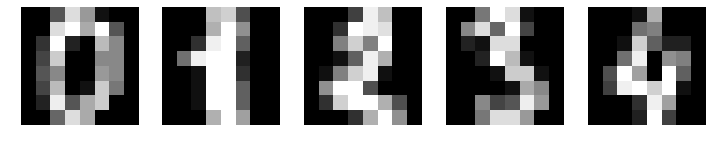

In [136]:
plotImages(x)

In [53]:
len(x)

1797

In [137]:
import pandas as pd
import numpy as np

In [149]:
a=np.ravel(x[0])
a

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [150]:
for i in range(1,len(x)):
    b=np.ravel(x[i])
    a=np.vstack([a,b])
    
#print(a)    

In [151]:
len(a)

1797

In [152]:
len(y)

1797

In [153]:
z=np.hstack([a,np.array(y).reshape(len(y),1)])

In [154]:
data=pd.DataFrame(z,dtype=int)

In [157]:
data=data.rename(columns={64:'digit'})

2.Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [159]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=3)
print(train.shape)
print(test.shape)

(1437, 65)
(360, 65)


In [160]:
train_x=train.iloc[:,:-1]
train_y=train['digit']
test_x=test.iloc[:,:-1]
test_y=test['digit']

In [163]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(train_x,train_y)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
from sklearn import metrics
y_pred=logistic.predict(test_x)
metrics.accuracy_score(y_pred,test_y)

0.9527777777777777

3.Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.[Hint:Refer to decomposition module of scikit learn]

In [184]:
dataPCA=data
xdata=dataPCA.iloc[:,:-1]

In [185]:

from sklearn.decomposition import PCA
for i in range(64):
    pca = PCA(n_components=i)
    pca.fit(xdata)
    print (i,pca.explained_variance_ratio_.sum())


0 0.0
1 0.14890593583962786
2 0.2850936482368944
3 0.4030395858761546
4 0.48713938008666224
5 0.5449635266639954
6 0.594132629682615
7 0.6372919939178193
8 0.6739055534558687
9 0.707435955285958
10 0.7382263287265188
11 0.761948655405748
12 0.7846757792110632
13 0.8028861768862959
14 0.8206240959192393
15 0.8353016525440876
16 0.849399494107695
17 0.8625766277782214
18 0.8750627633292513
19 0.8852445403929604
20 0.894299572776391
21 0.9031941498602062
22 0.9111603483990185
23 0.9188416814891801
24 0.9260717474719197
25 0.9330275407704162
26 0.9389917473659796
27 0.9447453054599793
28 0.9499002867555197
29 0.9547881030202012
30 0.9590825310938597
31 0.9628191910682694
32 0.9663492838519709
33 0.9697205644371519
34 0.9730005187986854
35 0.9760837515596728
36 0.9790217983177968
37 0.9815879093629435
38 0.9838650948281943
39 0.9860884293390157
40 0.9882027334665751
41 0.9901018242795364
42 0.9916883533457247
43 0.9931999526903914
44 0.9946057403272025
45 0.9957719632305019
46 0.99684688844

In [186]:
pca = PCA(n_components=29)
pca.fit(xdata)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [187]:
existing_2d = pca.transform(xdata)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = dataPCA.index
#existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-3.462141,2.680803,1.009460,2.009851,1.295437,1.179166,2.300536,3.671725,-0.943129,-1.133116
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074703,...,-5.255921,-1.206028,-4.837322,0.859991,-2.974623,5.287670,0.119164,2.182813,-0.524693,2.321924
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507663,1.843123,-16.415200,0.719233,4.255808,...,8.731604,4.951693,-2.464678,5.996714,0.103986,-3.064066,0.167453,4.223083,2.148807,0.821365
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973557,-3.259736,6.498754,...,-3.876880,0.269417,3.624070,2.537532,-1.355775,-1.741957,-1.340139,-5.848265,4.675831,-1.108978
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835412,13.414164,...,5.035636,0.207010,5.740131,-7.612906,3.991372,2.781523,-0.166350,0.483090,0.632364,-3.306584


In [189]:
existing_df_2d['digit']=dataPCA['digit']

In [190]:
existing_df_2d.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,digit
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,2.680803,1.009460,2.009851,1.295437,1.179166,2.300536,3.671725,-0.943129,-1.133116,0
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074703,...,-1.206028,-4.837322,0.859991,-2.974623,5.287670,0.119164,2.182813,-0.524693,2.321924,1
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507663,1.843123,-16.415200,0.719233,4.255808,...,4.951693,-2.464678,5.996714,0.103986,-3.064066,0.167453,4.223083,2.148807,0.821365,2
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973557,-3.259736,6.498754,...,0.269417,3.624070,2.537532,-1.355775,-1.741957,-1.340139,-5.848265,4.675831,-1.108978,3
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835412,13.414164,...,0.207010,5.740131,-7.612906,3.991372,2.781523,-0.166350,0.483090,0.632364,-3.306584,4


4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.[Hint: Project both the train and test samples to the new subspace]

In [191]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(existing_df_2d,test_size=0.2,random_state=3)
print(train.shape)
print(test.shape)

(1437, 30)
(360, 30)


In [192]:
train_x=train.iloc[:,:-1]
train_y=train['digit']
test_x=test.iloc[:,:-1]
test_y=test['digit']

In [193]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(train_x,train_y)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [194]:
from sklearn import metrics
y_pred=logistic.predict(test_x)
metrics.accuracy_score(y_pred,test_y) #getting same accuracy 

0.9527777777777777

5.Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.

In [195]:
import seaborn as sns

In [198]:
cm=metrics.confusion_matrix(y_pred,test_y)

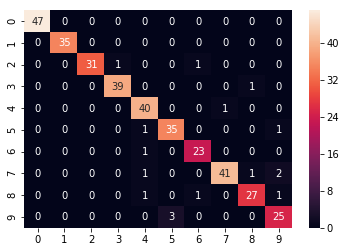

In [200]:
sns.heatmap(cm,annot=True)

In [207]:
final=pd.DataFrame({'test':test_y,'pred':y_pred})

In [210]:
final[final['test']!=final['pred']]

,test,pred
746,4,7
1660,4,8
361,9,7
1551,6,2
378,8,3
27,7,4
1018,5,9
69,9,8
951,5,9
1384,4,6


In [214]:
final[final['test']!=final['pred']].index

Int64Index([ 746, 1660,  361, 1551,  378,   27, 1018,   69,  951, 1384,    5,
              37, 1666,  578,   87,  751,  492],
           dtype='int64')

target:  4


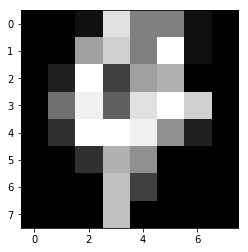

Predicted: 7
-----------------
target:  4


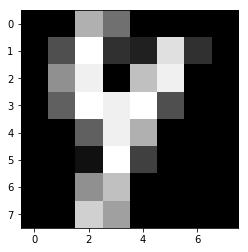

Predicted: 8
-----------------
target:  9


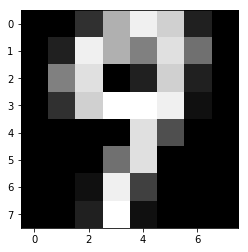

Predicted: 7
-----------------
target:  6


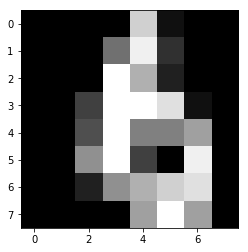

Predicted: 2
-----------------
target:  8


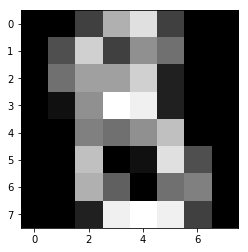

Predicted: 3
-----------------
target:  7


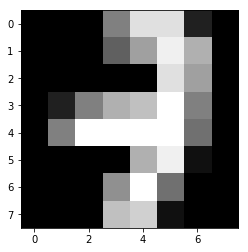

Predicted: 4
-----------------
target:  5


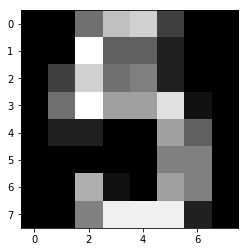

Predicted: 9
-----------------
target:  9


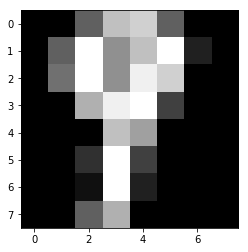

Predicted: 8
-----------------
target:  5


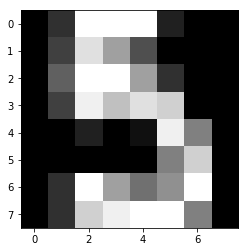

Predicted: 9
-----------------
target:  4


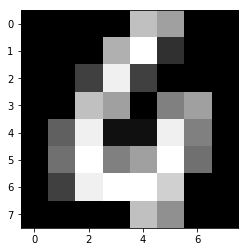

Predicted: 6
-----------------
target:  5


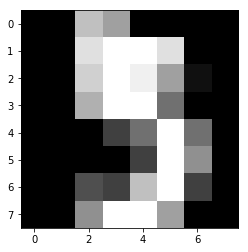

Predicted: 9
-----------------
target:  9


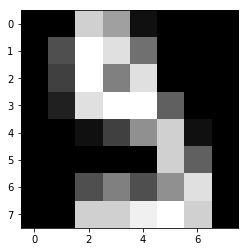

Predicted: 5
-----------------
target:  8


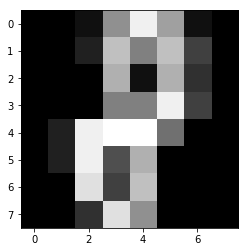

Predicted: 7
-----------------
target:  3


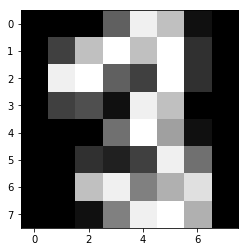

Predicted: 2
-----------------
target:  4


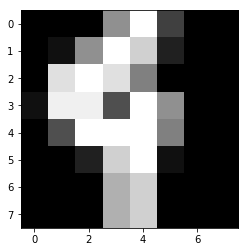

Predicted: 5
-----------------
target:  9


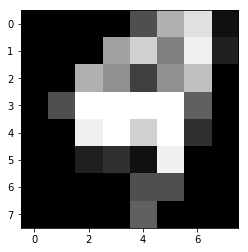

Predicted: 7
-----------------
target:  6


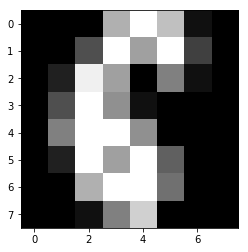

Predicted: 8
-----------------


In [234]:
for i in final[final['test']!=final['pred']].index:
    displayImg(x[i],y[i])
    print('Predicted:',final.loc[i,'pred'],end='\n-----------------\n')